In [1]:
import wedge

In [2]:
name  = "pi_24-r=1-d=12"
alpha = pi/24 # образующий угол клина
r     = 1     # половина размера меньшей щели, которая слева
d     = 12    # толщина мембраны

In [3]:
milk_angle = pi/4

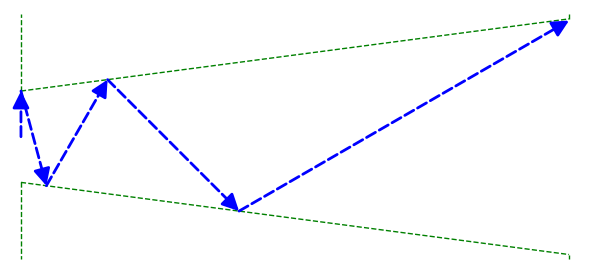

In [4]:
plt, state, number_of_reflections = wedge.integrand_out( \
    alpha=alpha, r=r, d=d, y=0, ang=pi/2)
plt.show(aspect_ratio = 1, axes=False)

In [5]:
state_y0, reflections_y0 = wedge.plot_state_depending_on_angle(y=0, alpha=alpha, r=r, d=d, milk_angle=milk_angle)

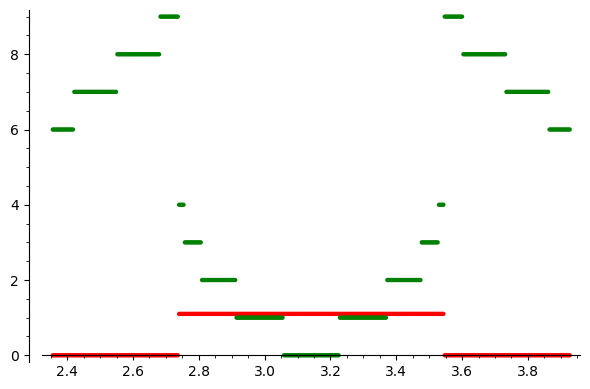

In [6]:
(
    list_plot(state_y0, color = "red") + \
    list_plot(reflections_y0, color = "green") \
).show()

In [7]:
state_y2, reflections_y2  = wedge.plot_state_depending_on_angle(y=2, alpha=alpha, r=r, d=d, milk_angle=milk_angle)

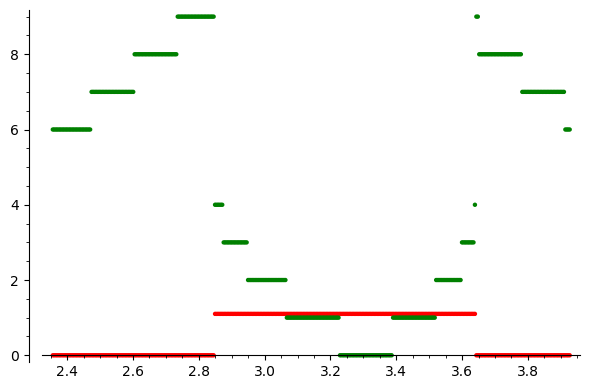

In [8]:
(
    list_plot(state_y2, color = "red") + \
    list_plot(reflections_y2, color = "green") \
).show()

In [9]:
R = (r+d*tan(alpha))
s_in_per_out = R/r

In [10]:
import numpy as np
try:
    passing_angle_yR  = \
        wedge.get_iterate_passing_angle_depending_on_y( \
            y=R, alpha=alpha, r=r, d=d)
except:
    passing_angle_yR = \
        wedge.get_iterate_passing_angle_depending_on_y( \
            y=R*0.999, alpha=alpha, r=r, d=d)
passing_angle_y0      = \
    wedge.get_iterate_passing_angle_depending_on_y( \
        y=0, alpha=alpha, r=r, d=d)

print("passing_angle_y0", (passing_angle_y0/pi*180).n())
print("passing_angle_yR", (passing_angle_yR/pi*180).n())

passing_coefficient_y0 = (passing_angle_y0/pi * s_in_per_out).n()
print("passing_coefficient with y = 0", passing_coefficient_y0)
passing_coefficient_yR = (passing_angle_yR/pi * s_in_per_out).n()
print("passing_coefficient with y = R", passing_coefficient_yR)

passing_angle_y0 46.0274359957543
passing_angle_yR 45.2129483455143
passing_coefficient with y = 0 0.659683104846528
passing_coefficient with y = R 0.648009551229094


In [11]:
s, n, y_grid, ang_grid, frames = wedge.make_investigation_plots(alpha=alpha, r=r, d=d, milk_angle=milk_angle)

In [12]:
wedge.calc_passing_coefficient(s, alpha, r, d, milk_angle)

sum passed 18481.0
sum all 72922
sum passed/all 0.2534351773127451
relation of squares of wedge sided in / out 2.5798299710487500665
passing coefficient 0.6538196661494741


0.6538196661494741

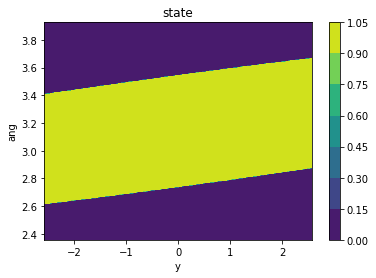

In [13]:
import matplotlib.pyplot as mplt
fig,ax=mplt.subplots(1,1)

cp = ax.contourf(y_grid, ang_grid, s)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('state')
ax.set_xlabel('y')
ax.set_ylabel('ang')
mplt.savefig("images/"+name+".state.png")

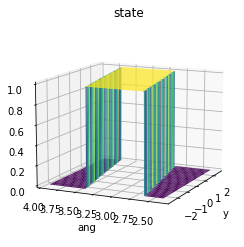

In [14]:
from mpl_toolkits import mplot3d
fig = mplt.figure()

ax = mplt.axes(projection='3d')
ax.plot_surface(y_grid,ang_grid, s, cmap='viridis', edgecolor='none')
ax.set_title('state')
ax.set_xlabel('y')
ax.set_ylabel('ang')
ax.elev = 30
ax.elev = 12
ax.azim = -60
ax.azim = -155
mplt.savefig("images/"+name+".state.3d.png")

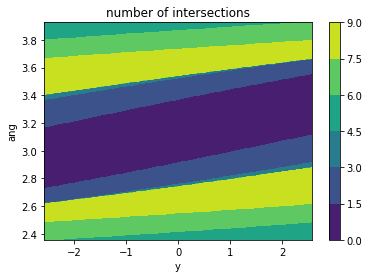

In [15]:
fig,ax=mplt.subplots(1,1)

cp = ax.contourf(y_grid,ang_grid, n)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('number of intersections')
ax.set_xlabel('y')
ax.set_ylabel('ang')
mplt.savefig("images/"+name+".intersections.png")

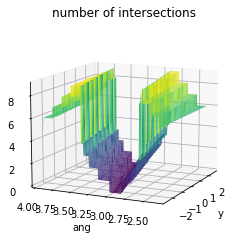

In [16]:
from mpl_toolkits import mplot3d
fig = mplt.figure()

ax = mplt.axes(projection='3d')
ax.plot_surface(y_grid,ang_grid, n, cmap='viridis', edgecolor='none')
ax.set_title('number of intersections')
ax.set_xlabel('y')
ax.set_ylabel('ang')
ax.roll = 0
ax.elev = 30
ax.elev = 12
ax.azim = -60
ax.azim = -155
mplt.savefig("images/"+name+".intersections.3d.png")

In [17]:
anime = animate(frames, aspect_ratio=1, axes=False)

In [18]:
anime.save("images/"+name+".gif", use_ffmpeg=True)

![pi_24-r=1-d=12.gif](images/pi_24-r=1-d=12.gif)